In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline


First, we want to fit the data with a logistic model.

In [2]:
names = ['age','workclass','fnlwgt','education','education-num','marital-status' ,  'occupation','relationship','race','sex',
'capital-gain','capital-loss','hours-per-week','native-country','income']
df_train = pd.read_csv('adult.data.txt',index_col=False,delim_whitespace=True,names=names,na_values='?')
df_test = pd.read_csv('adult.test.txt',index_col=False,delim_whitespace=True,names=names,na_values='?')
df_train.dropna()
df_test.dropna()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K.
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K.
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K.
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K.
10,65,Private,184454,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,6418,0,40,United-States,>50K.
11,36,Federal-gov,212465,Bachelors,13,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,<=50K.


Some of the features are categorical, so we need to encode them with either one-hot coding or
linear encoder.

In [3]:
from sklearn.preprocessing import LabelEncoder
# Hint: Now use a for loop over the elements in `le_category` and update df_le #TODO
encoder = LabelEncoder()

ohc_category = ['workclass', 'relationship' 
                 ,'native-country','occupation']
le_category=['sex','income','education','race','marital-status']

df_ohc_train = pd.get_dummies(df_train,columns=ohc_category) 
df_ohc_test = pd.get_dummies(df_test,columns=ohc_category) 


df_le_train = df_ohc_train.copy()
df_le_test = df_ohc_test.copy()
for i in range (len(le_category)):
    df_le_train[le_category[i]]  =encoder.fit_transform(df_le_train[le_category[i]])
    df_le_test[le_category[i]]  =encoder.fit_transform(df_le_test[le_category[i]])

df_le_test.head(6)

,age,fnlwgt,education,education-num,marital-status,race,sex,capital-gain,capital-loss,hours-per-week,...,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving
0,25,226802,1,7,4,2,1,0,0,40,...,0,0,1,0,0,0,0,0,0,0
1,38,89814,11,9,2,4,1,0,0,50,...,1,0,0,0,0,0,0,0,0,0
2,28,336951,7,12,2,4,1,0,0,40,...,0,0,0,0,0,0,1,0,0,0
3,44,160323,15,10,2,2,1,7688,0,40,...,0,0,1,0,0,0,0,0,0,0
4,18,103497,15,10,4,4,0,0,0,30,...,0,0,0,0,0,0,0,0,0,0
5,34,198693,0,6,4,4,1,0,0,30,...,0,0,0,1,0,0,0,0,0,0


We will train the model with all data in the trainin set and test the model with the test data.

In [4]:
X_df_train = np.array(df_le_train.drop(['income'],axis=1))
y_train = np.array(df_le_train['income'])
X_df_test = np.array(df_le_test.drop(['income'],axis=1))
y_test = np.array(df_le_test['income'])

nsamples,nfeatures=X_df_train.shape
print (' number of Train samples:{0} and number of features :{1}'.format(nsamples,nfeatures ))
nsamples,nfeatures=X_df_test.shape
print (' number of Test samples:{0} and number of features :{1}'.format(nsamples,nfeatures ))


 number of Train samples:32560 and number of features :78
 number of Test samples:16281 and number of features :78


In [5]:
import keras
from sklearn import preprocessing
from keras.models import Model, Sequential
from keras.layers import Dense, Activation

Xtr_mean = np.mean(X_df_train,axis=0)
Xtr_std = np.std(X_df_train,axis=0)
Xtr_scale = (X_df_train-Xtr_mean)/Xtr_std[None,:]
Xts_scale = (X_df_test-Xtr_mean[None,:])/Xtr_std[None,:]


F:\Tool_for_Study\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [6]:
import keras.backend as K


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden (Dense)               (None, 100)               7900      
_________________________________________________________________
output (Dense)               (None, 2)                 202       
Total params: 8,102
Trainable params: 8,102
Non-trainable params: 0
_________________________________________________________________
None
Train on 32560 samples, validate on 16281 samples
Epoch 1/30
32560/32560 [==============================] - 1s 23us/step - loss: 0.3464 - acc: 0.8383 - val_loss: 0.3266 - val_acc: 0.8477
Epoch 2/30
32560/32560 [==============================] - 0s 14us/step - loss: 0.3276 - acc: 0.8492 - val_loss: 0.3213 - val_acc: 0.8506
Epoch 3/30
32560/32560 [==============================] - 0s 14us/step - loss: 0.3168 - acc: 0.8532 - val_loss: 0.3169 - val_acc: 0.8528
Epoch 4/30
32560/32560 [==============================] - 0s 14us/step

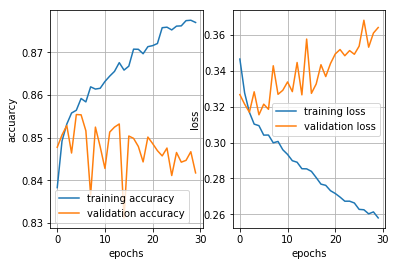

In [7]:
K.clear_session()
nin = Xtr_scale.shape[1]  # dimension of input data
nh = 100     # number of hidden units
nout = int(2)    # number of outputs = 2 since there is a class over income over 50K and another class with below 50K
model = Sequential()
model.add(Dense(nh, input_shape=(nin,), activation='sigmoid', name='hidden'))
model.add(Dense(nout, activation='softmax', name='output'))
print (model.summary())
from keras import optimizers
opt = optimizers.Adam(lr=0.02 ,beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
model.compile(optimizer=opt,loss='sparse_categorical_crossentropy',metrics=['accuracy'])
hist = model.fit(Xtr_scale, y_train, epochs=30, batch_size=100, validation_data=(Xts_scale,y_test))
tr_accuracy = hist.history['acc']
val_accuracy = hist.history['val_acc']
loss = hist.history['loss']
val_loss =  hist.history['val_loss']

plt.subplot(1,2,1)
plt.plot(tr_accuracy)
plt.plot(val_accuracy)
plt.grid()
plt.xlabel('epochs')
plt.ylabel('accuarcy')
plt.legend(['training accuracy', 'validation accuracy'])

plt.subplot(1,2,2)
plt.plot(loss)
plt.plot(val_loss)
plt.grid()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['training loss', 'validation loss'])

So we first test learning rate and beta_2 vs acc 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden (Dense)               (None, 100)               7900      
_________________________________________________________________
output (Dense)               (None, 2)                 202       
Total params: 8,102
Trainable params: 8,102
Non-trainable params: 0
_________________________________________________________________
None
Train on 32560 samples, validate on 16281 samples
Epoch 1/5
32560/32560 [==============================] - 1s 22us/step - loss: 0.5681 - acc: 0.7564 - val_loss: 0.5648 - val_acc: 0.7622
Epoch 2/5
32560/32560 [==============================] - 0s 14us/step - loss: 0.5681 - acc: 0.7564 - val_loss: 0.5648 - val_acc: 0.7622
Epoch 3/5
32560/32560 [==============================] - 0s 14us/step - loss: 0.5681 - acc: 0.7564 - val_loss: 0.5648 - val_acc: 0.7622
Epoch 4/5
32560/32560 [==============================] - 0s 13us/step - l

output (Dense)               (None, 2)                 202       
Total params: 8,102
Trainable params: 8,102
Non-trainable params: 0
_________________________________________________________________
None
Train on 32560 samples, validate on 16281 samples
Epoch 1/5
32560/32560 [==============================] - 1s 21us/step - loss: 1.1104 - acc: 0.2429 - val_loss: 1.1176 - val_acc: 0.2389
Epoch 2/5
32560/32560 [==============================] - 0s 13us/step - loss: 1.1104 - acc: 0.2429 - val_loss: 1.1176 - val_acc: 0.2389
Epoch 3/5
32560/32560 [==============================] - 0s 13us/step - loss: 1.1104 - acc: 0.2429 - val_loss: 1.1176 - val_acc: 0.2389
Epoch 4/5
32560/32560 [==============================] - 0s 14us/step - loss: 1.1104 - acc: 0.2429 - val_loss: 1.1176 - val_acc: 0.2389
Epoch 5/5
32560/32560 [==============================] - 0s 14us/step - loss: 1.1104 - acc: 0.2429 - val_loss: 1.1176 - val_acc: 0.2389
_________________________________________________________________

Train on 32560 samples, validate on 16281 samples
Epoch 1/5
32560/32560 [==============================] - 1s 26us/step - loss: 0.3472 - acc: 0.8392 - val_loss: 0.3328 - val_acc: 0.8401
Epoch 2/5
32560/32560 [==============================] - 0s 14us/step - loss: 0.3260 - acc: 0.8493 - val_loss: 0.3236 - val_acc: 0.8514
Epoch 3/5
32560/32560 [==============================] - 0s 13us/step - loss: 0.3185 - acc: 0.8518 - val_loss: 0.3164 - val_acc: 0.8550
Epoch 4/5
32560/32560 [==============================] - 0s 14us/step - loss: 0.3129 - acc: 0.8543 - val_loss: 0.3157 - val_acc: 0.8565
Epoch 5/5
32560/32560 [==============================] - 0s 14us/step - loss: 0.3080 - acc: 0.8561 - val_loss: 0.3125 - val_acc: 0.8552
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden (Dense)               (None, 100)               7900      
_________________________________________________________________
output

32560/32560 [==============================] - 0s 14us/step - loss: 0.3260 - acc: 0.8494 - val_loss: 0.3323 - val_acc: 0.8436
Epoch 3/5
32560/32560 [==============================] - 0s 14us/step - loss: 0.3191 - acc: 0.8515 - val_loss: 0.3191 - val_acc: 0.8539
Epoch 4/5
32560/32560 [==============================] - 0s 14us/step - loss: 0.3129 - acc: 0.8555 - val_loss: 0.3184 - val_acc: 0.8552
Epoch 5/5
32560/32560 [==============================] - 0s 14us/step - loss: 0.3095 - acc: 0.8560 - val_loss: 0.3187 - val_acc: 0.8503
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden (Dense)               (None, 100)               7900      
_________________________________________________________________
output (Dense)               (None, 2)                 202       
Total params: 8,102
Trainable params: 8,102
Non-trainable params: 0
_________________________________________________________________
No

32560/32560 [==============================] - 0s 14us/step - loss: 0.3156 - acc: 0.8534 - val_loss: 0.3209 - val_acc: 0.8557
Epoch 4/5
32560/32560 [==============================] - 0s 14us/step - loss: 0.3110 - acc: 0.8556 - val_loss: 0.3431 - val_acc: 0.8362
Epoch 5/5
32560/32560 [==============================] - 0s 14us/step - loss: 0.3079 - acc: 0.8585 - val_loss: 0.3233 - val_acc: 0.8495
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden (Dense)               (None, 100)               7900      
_________________________________________________________________
output (Dense)               (None, 2)                 202       
Total params: 8,102
Trainable params: 8,102
Non-trainable params: 0
_________________________________________________________________
None
Train on 32560 samples, validate on 16281 samples
Epoch 1/5
32560/32560 [==============================] - 1s 22us/step - loss: 0.347

32560/32560 [==============================] - 0s 14us/step - loss: 0.3247 - acc: 0.8533 - val_loss: 0.3308 - val_acc: 0.8533
Epoch 5/5
32560/32560 [==============================] - 0s 14us/step - loss: 0.3195 - acc: 0.8540 - val_loss: 0.3293 - val_acc: 0.8501
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden (Dense)               (None, 100)               7900      
_________________________________________________________________
output (Dense)               (None, 2)                 202       
Total params: 8,102
Trainable params: 8,102
Non-trainable params: 0
_________________________________________________________________
None
Train on 32560 samples, validate on 16281 samples
Epoch 1/5
32560/32560 [==============================] - 1s 21us/step - loss: 0.3583 - acc: 0.8341 - val_loss: 0.3405 - val_acc: 0.8395
Epoch 2/5
32560/32560 [==============================] - 0s 13us/step - loss: 0.331

32560/32560 [==============================] - 0s 13us/step - loss: 0.3148 - acc: 0.8548 - val_loss: 0.3200 - val_acc: 0.8513
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden (Dense)               (None, 100)               7900      
_________________________________________________________________
output (Dense)               (None, 2)                 202       
Total params: 8,102
Trainable params: 8,102
Non-trainable params: 0
_________________________________________________________________
None
Train on 32560 samples, validate on 16281 samples
Epoch 1/5
32560/32560 [==============================] - 1s 24us/step - loss: 0.3525 - acc: 0.8368 - val_loss: 0.3360 - val_acc: 0.8496
Epoch 2/5
32560/32560 [==============================] - 0s 13us/step - loss: 0.3292 - acc: 0.8476 - val_loss: 0.3262 - val_acc: 0.8504
Epoch 3/5
32560/32560 [==============================] - 0s 13us/step - loss: 0.324

Train on 32560 samples, validate on 16281 samples
Epoch 1/5
32560/32560 [==============================] - 1s 21us/step - loss: 0.3620 - acc: 0.8364 - val_loss: 0.3423 - val_acc: 0.8471
Epoch 2/5
32560/32560 [==============================] - 0s 13us/step - loss: 0.3359 - acc: 0.8470 - val_loss: 0.3389 - val_acc: 0.8502
Epoch 3/5
32560/32560 [==============================] - 0s 13us/step - loss: 0.3302 - acc: 0.8501 - val_loss: 0.3556 - val_acc: 0.8523
Epoch 4/5
32560/32560 [==============================] - 0s 13us/step - loss: 0.3349 - acc: 0.8513 - val_loss: 0.3263 - val_acc: 0.8479
Epoch 5/5
32560/32560 [==============================] - 0s 13us/step - loss: 0.3251 - acc: 0.8533 - val_loss: 0.3405 - val_acc: 0.8501
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden (Dense)               (None, 100)               7900      
_________________________________________________________________
output

32560/32560 [==============================] - 0s 13us/step - loss: 0.3278 - acc: 0.8481 - val_loss: 0.3328 - val_acc: 0.8445
Epoch 3/5
32560/32560 [==============================] - 0s 14us/step - loss: 0.3281 - acc: 0.8497 - val_loss: 0.3581 - val_acc: 0.8259
Epoch 4/5
32560/32560 [==============================] - 0s 14us/step - loss: 0.3243 - acc: 0.8512 - val_loss: 0.3499 - val_acc: 0.8501
Epoch 5/5
32560/32560 [==============================] - 0s 13us/step - loss: 0.3225 - acc: 0.8532 - val_loss: 0.3277 - val_acc: 0.8508
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden (Dense)               (None, 100)               7900      
_________________________________________________________________
output (Dense)               (None, 2)                 202       
Total params: 8,102
Trainable params: 8,102
Non-trainable params: 0
_________________________________________________________________
No

32560/32560 [==============================] - 0s 13us/step - loss: 0.3375 - acc: 0.8472 - val_loss: 0.3489 - val_acc: 0.8367
Epoch 4/5
32560/32560 [==============================] - 0s 13us/step - loss: 0.3290 - acc: 0.8499 - val_loss: 0.3354 - val_acc: 0.8536
Epoch 5/5
32560/32560 [==============================] - 0s 13us/step - loss: 0.3406 - acc: 0.8476 - val_loss: 0.3460 - val_acc: 0.8402
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden (Dense)               (None, 100)               7900      
_________________________________________________________________
output (Dense)               (None, 2)                 202       
Total params: 8,102
Trainable params: 8,102
Non-trainable params: 0
_________________________________________________________________
None
Train on 32560 samples, validate on 16281 samples
Epoch 1/5
32560/32560 [==============================] - 1s 21us/step - loss: 0.361

32560/32560 [==============================] - 0s 13us/step - loss: 0.3586 - acc: 0.8450 - val_loss: 0.3817 - val_acc: 0.8463
Epoch 5/5
32560/32560 [==============================] - 0s 13us/step - loss: 0.3820 - acc: 0.8459 - val_loss: 0.3496 - val_acc: 0.8461
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden (Dense)               (None, 100)               7900      
_________________________________________________________________
output (Dense)               (None, 2)                 202       
Total params: 8,102
Trainable params: 8,102
Non-trainable params: 0
_________________________________________________________________
None
Train on 32560 samples, validate on 16281 samples
Epoch 1/5
32560/32560 [==============================] - 1s 21us/step - loss: 0.3859 - acc: 0.8282 - val_loss: 0.4065 - val_acc: 0.8428
Epoch 2/5
32560/32560 [==============================] - 0s 13us/step - loss: 0.359

32560/32560 [==============================] - 0s 14us/step - loss: 0.3388 - acc: 0.8471 - val_loss: 0.3594 - val_acc: 0.8484
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden (Dense)               (None, 100)               7900      
_________________________________________________________________
output (Dense)               (None, 2)                 202       
Total params: 8,102
Trainable params: 8,102
Non-trainable params: 0
_________________________________________________________________
None
Train on 32560 samples, validate on 16281 samples
Epoch 1/5
32560/32560 [==============================] - 1s 21us/step - loss: 0.3649 - acc: 0.8334 - val_loss: 0.3382 - val_acc: 0.8423
Epoch 2/5
32560/32560 [==============================] - 0s 13us/step - loss: 0.3338 - acc: 0.8476 - val_loss: 0.3569 - val_acc: 0.8286
Epoch 3/5
32560/32560 [==============================] - 0s 13us/step - loss: 0.340

Train on 32560 samples, validate on 16281 samples
Epoch 1/5
32560/32560 [==============================] - 1s 23us/step - loss: 0.3894 - acc: 0.8302 - val_loss: 0.4562 - val_acc: 0.8378
Epoch 2/5
32560/32560 [==============================] - 0s 13us/step - loss: 0.3573 - acc: 0.8421 - val_loss: 0.3976 - val_acc: 0.8239
Epoch 3/5
32560/32560 [==============================] - 0s 13us/step - loss: 0.3639 - acc: 0.8413 - val_loss: 0.3408 - val_acc: 0.8495
Epoch 4/5
32560/32560 [==============================] - 0s 13us/step - loss: 0.3589 - acc: 0.8459 - val_loss: 0.4726 - val_acc: 0.7845
Epoch 5/5
32560/32560 [==============================] - 0s 13us/step - loss: 0.3624 - acc: 0.8438 - val_loss: 0.7874 - val_acc: 0.7399
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden (Dense)               (None, 100)               7900      
_________________________________________________________________
output

32560/32560 [==============================] - 0s 13us/step - loss: 0.4286 - acc: 0.8368 - val_loss: 0.5099 - val_acc: 0.7996
Epoch 3/5
32560/32560 [==============================] - 0s 13us/step - loss: 0.4070 - acc: 0.8398 - val_loss: 0.4408 - val_acc: 0.8437
Epoch 4/5
32560/32560 [==============================] - 0s 13us/step - loss: 0.4339 - acc: 0.8369 - val_loss: 0.5275 - val_acc: 0.7904
Epoch 5/5
32560/32560 [==============================] - 0s 13us/step - loss: 0.4332 - acc: 0.8392 - val_loss: 0.3972 - val_acc: 0.8489
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden (Dense)               (None, 100)               7900      
_________________________________________________________________
output (Dense)               (None, 2)                 202       
Total params: 8,102
Trainable params: 8,102
Non-trainable params: 0
_________________________________________________________________
No

32560/32560 [==============================] - 0s 13us/step - loss: 0.3706 - acc: 0.8406 - val_loss: 0.3654 - val_acc: 0.8370
Epoch 4/5
32560/32560 [==============================] - 0s 13us/step - loss: 0.3574 - acc: 0.8423 - val_loss: 0.3516 - val_acc: 0.8391
Epoch 5/5
32560/32560 [==============================] - 0s 13us/step - loss: 0.3664 - acc: 0.8415 - val_loss: 0.3582 - val_acc: 0.8406
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden (Dense)               (None, 100)               7900      
_________________________________________________________________
output (Dense)               (None, 2)                 202       
Total params: 8,102
Trainable params: 8,102
Non-trainable params: 0
_________________________________________________________________
None
Train on 32560 samples, validate on 16281 samples
Epoch 1/5
32560/32560 [==============================] - 1s 21us/step - loss: 0.383

32560/32560 [==============================] - 0s 13us/step - loss: 0.4478 - acc: 0.8356 - val_loss: 0.5590 - val_acc: 0.8288
Epoch 5/5
32560/32560 [==============================] - 0s 13us/step - loss: 0.4302 - acc: 0.8362 - val_loss: 0.5866 - val_acc: 0.8409
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden (Dense)               (None, 100)               7900      
_________________________________________________________________
output (Dense)               (None, 2)                 202       
Total params: 8,102
Trainable params: 8,102
Non-trainable params: 0
_________________________________________________________________
None
Train on 32560 samples, validate on 16281 samples
Epoch 1/5
32560/32560 [==============================] - 1s 23us/step - loss: 0.4205 - acc: 0.8255 - val_loss: 0.4233 - val_acc: 0.8367
Epoch 2/5
32560/32560 [==============================] - 0s 13us/step - loss: 0.393

32560/32560 [==============================] - 0s 13us/step - loss: 0.3640 - acc: 0.8434 - val_loss: 0.4107 - val_acc: 0.8429
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden (Dense)               (None, 100)               7900      
_________________________________________________________________
output (Dense)               (None, 2)                 202       
Total params: 8,102
Trainable params: 8,102
Non-trainable params: 0
_________________________________________________________________
None
Train on 32560 samples, validate on 16281 samples
Epoch 1/5
32560/32560 [==============================] - 1s 21us/step - loss: 0.4025 - acc: 0.8260 - val_loss: 0.4060 - val_acc: 0.8472
Epoch 2/5
32560/32560 [==============================] - 0s 13us/step - loss: 0.3494 - acc: 0.8418 - val_loss: 0.3384 - val_acc: 0.8503
Epoch 3/5
32560/32560 [==============================] - 0s 13us/step - loss: 0.360

Text(0,0.5,'accuarcy')

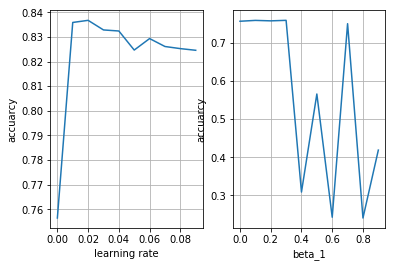

In [8]:

##hyper parameters

acc =np.zeros((10,10))
for i in range (10):
    for j in range (10):
        K.clear_session()
        nin = Xtr_scale.shape[1]  # dimension of input data
        nh = 100     # number of hidden units
        nout = int(2)    # number of outputs = 10 since there are 10 classes
        model = Sequential()
        model.add(Dense(nh, input_shape=(nin,), activation='sigmoid', name='hidden'))
        model.add(Dense(nout, activation='softmax', name='output'))
        print (model.summary())
        from keras import optimizers
        opt = optimizers.Adam(lr=0.01*i ,beta_1=0.1*j, beta_2=0.999, epsilon=1e-08, decay=0.0)
        model.compile(optimizer=opt,
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])
        hist = model.fit(Xtr_scale, y_train, epochs=5, batch_size=100, validation_data=(Xts_scale,y_test))
        acc[i][j]= hist.history['acc'][0]

plt.subplot(1,2,1)
plt.plot(np.arange(10)*0.01,acc [:,0])
plt.grid()
plt.xlabel('learning rate')
plt.ylabel('accuarcy')

plt.subplot(1,2,2)
plt.plot(np.arange(10)*0.1,acc [0,:])
plt.plot()
plt.grid()
plt.xlabel('beta_1')
plt.ylabel('accuarcy')


Now we try to using different beta_2 and epsilon to see what going change on the acc 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden (Dense)               (None, 100)               7900      
_________________________________________________________________
output (Dense)               (None, 2)                 202       
Total params: 8,102
Trainable params: 8,102
Non-trainable params: 0
_________________________________________________________________
None
Train on 32560 samples, validate on 16281 samples
Epoch 1/5
32560/32560 [==============================] - 1s 24us/step - loss: nan - acc: 0.7598 - val_loss: nan - val_acc: 0.7638
Epoch 2/5
32560/32560 [==============================] - 0s 13us/step - loss: nan - acc: 0.7592 - val_loss: nan - val_acc: 0.7638
Epoch 3/5
32560/32560 [==============================] - 0s 13us/step - loss: nan - acc: 0.7592 - val_loss: nan - val_acc: 0.7638
Epoch 4/5
32560/32560 [==============================] - 0s 14us/step - loss: nan - acc: 0.

Train on 32560 samples, validate on 16281 samples
Epoch 1/5
32560/32560 [==============================] - 1s 21us/step - loss: 0.3683 - acc: 0.8269 - val_loss: 0.3315 - val_acc: 0.8473
Epoch 2/5
32560/32560 [==============================] - 0s 13us/step - loss: 0.3310 - acc: 0.8455 - val_loss: 0.3256 - val_acc: 0.8487
Epoch 3/5
32560/32560 [==============================] - 0s 13us/step - loss: 0.3258 - acc: 0.8494 - val_loss: 0.3229 - val_acc: 0.8514
Epoch 4/5
32560/32560 [==============================] - 0s 13us/step - loss: 0.3230 - acc: 0.8498 - val_loss: 0.3231 - val_acc: 0.8513
Epoch 5/5
32560/32560 [==============================] - 0s 13us/step - loss: 0.3225 - acc: 0.8496 - val_loss: 0.3215 - val_acc: 0.8519
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden (Dense)               (None, 100)               7900      
_________________________________________________________________
output

32560/32560 [==============================] - 0s 13us/step - loss: 0.3292 - acc: 0.8453 - val_loss: 0.3284 - val_acc: 0.8479
Epoch 3/5
32560/32560 [==============================] - 0s 14us/step - loss: 0.3256 - acc: 0.8501 - val_loss: 0.3431 - val_acc: 0.8410
Epoch 4/5
32560/32560 [==============================] - 0s 13us/step - loss: 0.3245 - acc: 0.8492 - val_loss: 0.3599 - val_acc: 0.8278
Epoch 5/5
32560/32560 [==============================] - 0s 13us/step - loss: 0.3249 - acc: 0.8495 - val_loss: 0.3255 - val_acc: 0.8515
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden (Dense)               (None, 100)               7900      
_________________________________________________________________
output (Dense)               (None, 2)                 202       
Total params: 8,102
Trainable params: 8,102
Non-trainable params: 0
_________________________________________________________________
No

32560/32560 [==============================] - 0s 14us/step - loss: 0.3273 - acc: 0.8476 - val_loss: 0.3257 - val_acc: 0.8499
Epoch 4/5
32560/32560 [==============================] - 0s 14us/step - loss: 0.3241 - acc: 0.8489 - val_loss: 0.3240 - val_acc: 0.8507
Epoch 5/5
32560/32560 [==============================] - 0s 14us/step - loss: 0.3229 - acc: 0.8499 - val_loss: 0.3237 - val_acc: 0.8495
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden (Dense)               (None, 100)               7900      
_________________________________________________________________
output (Dense)               (None, 2)                 202       
Total params: 8,102
Trainable params: 8,102
Non-trainable params: 0
_________________________________________________________________
None
Train on 32560 samples, validate on 16281 samples
Epoch 1/5
32560/32560 [==============================] - 1s 25us/step - loss: 0.384

32560/32560 [==============================] - 0s 14us/step - loss: 0.3238 - acc: 0.8487 - val_loss: 0.3279 - val_acc: 0.8493
Epoch 5/5
32560/32560 [==============================] - 0s 14us/step - loss: 0.3229 - acc: 0.8500 - val_loss: 0.3260 - val_acc: 0.8494
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden (Dense)               (None, 100)               7900      
_________________________________________________________________
output (Dense)               (None, 2)                 202       
Total params: 8,102
Trainable params: 8,102
Non-trainable params: 0
_________________________________________________________________
None
Train on 32560 samples, validate on 16281 samples
Epoch 1/5
32560/32560 [==============================] - 1s 21us/step - loss: 0.3739 - acc: 0.8232 - val_loss: 0.3318 - val_acc: 0.8456
Epoch 2/5
32560/32560 [==============================] - 0s 13us/step - loss: 0.331

32560/32560 [==============================] - 0s 13us/step - loss: 0.3241 - acc: 0.8531 - val_loss: 0.3241 - val_acc: 0.8525
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden (Dense)               (None, 100)               7900      
_________________________________________________________________
output (Dense)               (None, 2)                 202       
Total params: 8,102
Trainable params: 8,102
Non-trainable params: 0
_________________________________________________________________
None
Train on 32560 samples, validate on 16281 samples
Epoch 1/5
32560/32560 [==============================] - 1s 21us/step - loss: 0.3490 - acc: 0.8354 - val_loss: 0.3320 - val_acc: 0.8444
Epoch 2/5
32560/32560 [==============================] - 0s 13us/step - loss: 0.3301 - acc: 0.8459 - val_loss: 0.3350 - val_acc: 0.8471
Epoch 3/5
32560/32560 [==============================] - 0s 13us/step - loss: 0.328

Train on 32560 samples, validate on 16281 samples
Epoch 1/5
32560/32560 [==============================] - 1s 21us/step - loss: 0.3779 - acc: 0.8197 - val_loss: 0.3343 - val_acc: 0.8454
Epoch 2/5
32560/32560 [==============================] - 0s 13us/step - loss: 0.3326 - acc: 0.8444 - val_loss: 0.3269 - val_acc: 0.8486
Epoch 3/5
32560/32560 [==============================] - 0s 13us/step - loss: 0.3269 - acc: 0.8483 - val_loss: 0.3303 - val_acc: 0.8463
Epoch 4/5
32560/32560 [==============================] - 0s 13us/step - loss: 0.3240 - acc: 0.8492 - val_loss: 0.3246 - val_acc: 0.8488
Epoch 5/5
32560/32560 [==============================] - 0s 13us/step - loss: 0.3221 - acc: 0.8504 - val_loss: 0.3299 - val_acc: 0.8458
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden (Dense)               (None, 100)               7900      
_________________________________________________________________
output

32560/32560 [==============================] - 0s 13us/step - loss: 0.3292 - acc: 0.8461 - val_loss: 0.3233 - val_acc: 0.8506
Epoch 3/5
32560/32560 [==============================] - 0s 13us/step - loss: 0.3253 - acc: 0.8485 - val_loss: 0.3244 - val_acc: 0.8504
Epoch 4/5
32560/32560 [==============================] - 0s 13us/step - loss: 0.3244 - acc: 0.8482 - val_loss: 0.3218 - val_acc: 0.8509
Epoch 5/5
32560/32560 [==============================] - 0s 13us/step - loss: 0.3226 - acc: 0.8513 - val_loss: 0.3212 - val_acc: 0.8532
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden (Dense)               (None, 100)               7900      
_________________________________________________________________
output (Dense)               (None, 2)                 202       
Total params: 8,102
Trainable params: 8,102
Non-trainable params: 0
_________________________________________________________________
No

32560/32560 [==============================] - 0s 14us/step - loss: 0.3276 - acc: 0.8472 - val_loss: 0.3261 - val_acc: 0.8492
Epoch 4/5
32560/32560 [==============================] - 0s 14us/step - loss: 0.3246 - acc: 0.8499 - val_loss: 0.3270 - val_acc: 0.8485
Epoch 5/5
32560/32560 [==============================] - 0s 13us/step - loss: 0.3229 - acc: 0.8499 - val_loss: 0.3224 - val_acc: 0.8507
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden (Dense)               (None, 100)               7900      
_________________________________________________________________
output (Dense)               (None, 2)                 202       
Total params: 8,102
Trainable params: 8,102
Non-trainable params: 0
_________________________________________________________________
None
Train on 32560 samples, validate on 16281 samples
Epoch 1/5
32560/32560 [==============================] - 1s 21us/step - loss: 0.349

32560/32560 [==============================] - 0s 13us/step - loss: 0.3233 - acc: 0.8489 - val_loss: 0.3220 - val_acc: 0.8507
Epoch 5/5
32560/32560 [==============================] - 0s 14us/step - loss: 0.3221 - acc: 0.8506 - val_loss: 0.3366 - val_acc: 0.8421
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden (Dense)               (None, 100)               7900      
_________________________________________________________________
output (Dense)               (None, 2)                 202       
Total params: 8,102
Trainable params: 8,102
Non-trainable params: 0
_________________________________________________________________
None
Train on 32560 samples, validate on 16281 samples
Epoch 1/5
32560/32560 [==============================] - 1s 21us/step - loss: 0.3695 - acc: 0.8254 - val_loss: 0.3336 - val_acc: 0.8453
Epoch 2/5
32560/32560 [==============================] - 0s 14us/step - loss: 0.330

32560/32560 [==============================] - 0s 13us/step - loss: 0.3237 - acc: 0.8494 - val_loss: 0.3209 - val_acc: 0.8523
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden (Dense)               (None, 100)               7900      
_________________________________________________________________
output (Dense)               (None, 2)                 202       
Total params: 8,102
Trainable params: 8,102
Non-trainable params: 0
_________________________________________________________________
None
Train on 32560 samples, validate on 16281 samples
Epoch 1/5
32560/32560 [==============================] - 1s 21us/step - loss: 0.3659 - acc: 0.8268 - val_loss: 0.3287 - val_acc: 0.8484
Epoch 2/5
32560/32560 [==============================] - 0s 13us/step - loss: 0.3288 - acc: 0.8470 - val_loss: 0.3237 - val_acc: 0.8506
Epoch 3/5
32560/32560 [==============================] - 0s 13us/step - loss: 0.326

Train on 32560 samples, validate on 16281 samples
Epoch 1/5
32560/32560 [==============================] - 1s 22us/step - loss: 0.3846 - acc: 0.8197 - val_loss: 0.3397 - val_acc: 0.8431
Epoch 2/5
32560/32560 [==============================] - 0s 14us/step - loss: 0.3329 - acc: 0.8446 - val_loss: 0.3287 - val_acc: 0.8477
Epoch 3/5
32560/32560 [==============================] - 0s 15us/step - loss: 0.3271 - acc: 0.8474 - val_loss: 0.3301 - val_acc: 0.8480
Epoch 4/5
32560/32560 [==============================] - 0s 14us/step - loss: 0.3239 - acc: 0.8491 - val_loss: 0.3313 - val_acc: 0.8459
Epoch 5/5
32560/32560 [==============================] - 0s 15us/step - loss: 0.3224 - acc: 0.8500 - val_loss: 0.3221 - val_acc: 0.8514
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden (Dense)               (None, 100)               7900      
_________________________________________________________________
output

32560/32560 [==============================] - 0s 13us/step - loss: 0.3289 - acc: 0.8461 - val_loss: 0.3255 - val_acc: 0.8504
Epoch 3/5
32560/32560 [==============================] - 0s 13us/step - loss: 0.3258 - acc: 0.8483 - val_loss: 0.3321 - val_acc: 0.8456
Epoch 4/5
32560/32560 [==============================] - 0s 13us/step - loss: 0.3244 - acc: 0.8490 - val_loss: 0.3226 - val_acc: 0.8522
Epoch 5/5
32560/32560 [==============================] - 0s 13us/step - loss: 0.3228 - acc: 0.8494 - val_loss: 0.3212 - val_acc: 0.8502
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden (Dense)               (None, 100)               7900      
_________________________________________________________________
output (Dense)               (None, 2)                 202       
Total params: 8,102
Trainable params: 8,102
Non-trainable params: 0
_________________________________________________________________
No

32560/32560 [==============================] - 0s 13us/step - loss: 0.3205 - acc: 0.8532 - val_loss: 0.3187 - val_acc: 0.8546
Epoch 4/5
32560/32560 [==============================] - 0s 13us/step - loss: 0.3171 - acc: 0.8558 - val_loss: 0.3221 - val_acc: 0.8542
Epoch 5/5
32560/32560 [==============================] - 0s 13us/step - loss: 0.3135 - acc: 0.8561 - val_loss: 0.3184 - val_acc: 0.8555
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden (Dense)               (None, 100)               7900      
_________________________________________________________________
output (Dense)               (None, 2)                 202       
Total params: 8,102
Trainable params: 8,102
Non-trainable params: 0
_________________________________________________________________
None
Train on 32560 samples, validate on 16281 samples
Epoch 1/5
32560/32560 [==============================] - 1s 21us/step - loss: 0.352

32560/32560 [==============================] - 0s 14us/step - loss: 0.3234 - acc: 0.8491 - val_loss: 0.3284 - val_acc: 0.8476
Epoch 5/5
32560/32560 [==============================] - 0s 13us/step - loss: 0.3216 - acc: 0.8488 - val_loss: 0.3219 - val_acc: 0.8515
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden (Dense)               (None, 100)               7900      
_________________________________________________________________
output (Dense)               (None, 2)                 202       
Total params: 8,102
Trainable params: 8,102
Non-trainable params: 0
_________________________________________________________________
None
Train on 32560 samples, validate on 16281 samples
Epoch 1/5
32560/32560 [==============================] - 1s 25us/step - loss: 0.3845 - acc: 0.8173 - val_loss: 0.3347 - val_acc: 0.8448
Epoch 2/5
32560/32560 [==============================] - 0s 14us/step - loss: 0.332

32560/32560 [==============================] - 0s 14us/step - loss: 0.3247 - acc: 0.8488 - val_loss: 0.3324 - val_acc: 0.8418
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden (Dense)               (None, 100)               7900      
_________________________________________________________________
output (Dense)               (None, 2)                 202       
Total params: 8,102
Trainable params: 8,102
Non-trainable params: 0
_________________________________________________________________
None
Train on 32560 samples, validate on 16281 samples
Epoch 1/5
32560/32560 [==============================] - 1s 21us/step - loss: 0.3599 - acc: 0.8307 - val_loss: 0.3310 - val_acc: 0.8462
Epoch 2/5
32560/32560 [==============================] - 0s 13us/step - loss: 0.3292 - acc: 0.8473 - val_loss: 0.3228 - val_acc: 0.8504
Epoch 3/5
32560/32560 [==============================] - 0s 13us/step - loss: 0.325

Train on 32560 samples, validate on 16281 samples
Epoch 1/5
32560/32560 [==============================] - 1s 24us/step - loss: 0.3909 - acc: 0.8177 - val_loss: 0.3450 - val_acc: 0.8400
Epoch 2/5
32560/32560 [==============================] - 0s 13us/step - loss: 0.3353 - acc: 0.8438 - val_loss: 0.3302 - val_acc: 0.8464
Epoch 3/5
32560/32560 [==============================] - 0s 14us/step - loss: 0.3280 - acc: 0.8462 - val_loss: 0.3262 - val_acc: 0.8501
Epoch 4/5
32560/32560 [==============================] - 0s 14us/step - loss: 0.3248 - acc: 0.8494 - val_loss: 0.3230 - val_acc: 0.8523
Epoch 5/5
32560/32560 [==============================] - 0s 14us/step - loss: 0.3230 - acc: 0.8500 - val_loss: 0.3236 - val_acc: 0.8518


Text(0,0.5,'accuarcy')

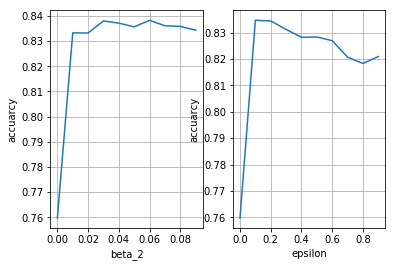

In [9]:

acc =np.zeros((10,10))
for i in range (10):
    for j in range (10):
        K.clear_session()
        nin = Xtr_scale.shape[1]  # dimension of input data
        nh = 100     # number of hidden units
        nout = int(2)    # number of outputs = 10 since there are 10 classes
        model = Sequential()
        model.add(Dense(nh, input_shape=(nin,), activation='sigmoid', name='hidden'))
        model.add(Dense(nout, activation='softmax', name='output'))
        print (model.summary())
        from keras import optimizers
        opt = optimizers.Adam(lr=0.01 ,beta_1=0.1, beta_2=0.1*i, epsilon=0.01*j, decay=0.0)
        model.compile(optimizer=opt,
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])
        hist = model.fit(Xtr_scale, y_train, epochs=5, batch_size=100, validation_data=(Xts_scale,y_test))
        acc[i][j]= hist.history['acc'][0]

plt.subplot(1,2,1)
plt.plot(np.arange(10)*0.01,acc [:,0])
plt.grid()
plt.xlabel('beta_2')
plt.ylabel('accuarcy')

plt.subplot(1,2,2)
plt.plot(np.arange(10)*0.1,acc [0,:])
plt.plot()
plt.grid()
plt.xlabel('epsilon')
plt.ylabel('accuarcy')



then we try to find out what the effect of hidden units on the acc

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden (Dense)               (None, 10)                790       
_________________________________________________________________
output (Dense)               (None, 2)                 22        
Total params: 812
Trainable params: 812
Non-trainable params: 0
_________________________________________________________________
None
Train on 32560 samples, validate on 16281 samples
Epoch 1/5
32560/32560 [==============================] - 1s 19us/step - loss: 0.3432 - acc: 0.8379 - val_loss: 0.3257 - val_acc: 0.8522
Epoch 2/5
32560/32560 [==============================] - 0s 12us/step - loss: 0.3226 - acc: 0.8519 - val_loss: 0.3240 - val_acc: 0.8514
Epoch 3/5
32560/32560 [==============================] - 0s 12us/step - loss: 0.3161 - acc: 0.8540 - val_loss: 0.3197 - val_acc: 0.8530
Epoch 4/5
32560/32560 [==============================] - 0s 11us/step - loss:

Train on 32560 samples, validate on 16281 samples
Epoch 1/5
32560/32560 [==============================] - 1s 27us/step - loss: 0.3418 - acc: 0.8406 - val_loss: 0.3244 - val_acc: 0.8512
Epoch 2/5
32560/32560 [==============================] - 1s 16us/step - loss: 0.3220 - acc: 0.8504 - val_loss: 0.3224 - val_acc: 0.8480
Epoch 3/5
32560/32560 [==============================] - 0s 15us/step - loss: 0.3155 - acc: 0.8540 - val_loss: 0.3174 - val_acc: 0.8542
Epoch 4/5
32560/32560 [==============================] - 0s 14us/step - loss: 0.3094 - acc: 0.8568 - val_loss: 0.3171 - val_acc: 0.8517
Epoch 5/5
32560/32560 [==============================] - 0s 14us/step - loss: 0.3066 - acc: 0.8576 - val_loss: 0.3219 - val_acc: 0.8574
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden (Dense)               (None, 80)                6320      
_________________________________________________________________
output

Text(0,0.5,'accuarcy')

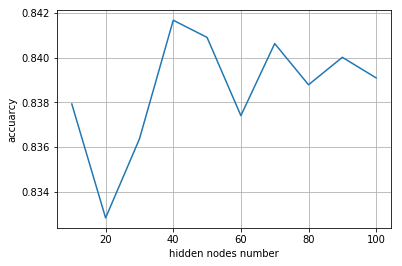

In [16]:
acc =np.zeros((10,10))
for i in range (10):
    K.clear_session()
    nin = Xtr_scale.shape[1]  # dimension of input data
    nh = 10*i+10     # number of hidden units
    nout = int(2)    # number of outputs = 10 since there are 10 classes
    model = Sequential()
    model.add(Dense(nh, input_shape=(nin,), activation='sigmoid', name='hidden'))
    model.add(Dense(nout, activation='softmax', name='output'))
    print (model.summary())
    from keras import optimizers
    opt = optimizers.Adam(lr=0.02 ,beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
    model.compile(optimizer=opt,loss='sparse_categorical_crossentropy',metrics=['accuracy'])
    hist = model.fit(Xtr_scale, y_train, epochs=5, batch_size=100, validation_data=(Xts_scale,y_test))
    acc[i][0]= hist.history['acc'][0]


plt.plot(np.arange(10)*10+10,acc [:,0])
plt.grid()
plt.xlabel('hidden nodes number')
plt.ylabel('accuarcy')



finanlly we try to using different layer number to test the acc

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden0 (Dense)              (None, 100)               7900      
_________________________________________________________________
output (Dense)               (None, 2)                 202       
Total params: 8,102
Trainable params: 8,102
Non-trainable params: 0
_________________________________________________________________
None
Train on 32560 samples, validate on 16281 samples
Epoch 1/5
32560/32560 [==============================] - 1s 22us/step - loss: 0.3505 - acc: 0.8368 - val_loss: 0.3296 - val_acc: 0.8495
Epoch 2/5
32560/32560 [==============================] - 0s 13us/step - loss: 0.3240 - acc: 0.8483 - val_loss: 0.3252 - val_acc: 0.8479
Epoch 3/5
32560/32560 [==============================] - 0s 13us/step - loss: 0.3188 - acc: 0.8517 - val_loss: 0.3330 - val_acc: 0.8418
Epoch 4/5
32560/32560 [==============================] - 0s 14us/step - l

Train on 32560 samples, validate on 16281 samples
Epoch 1/5
32560/32560 [==============================] - 2s 51us/step - loss: 0.4706 - acc: 0.7859 - val_loss: 0.3530 - val_acc: 0.8304
Epoch 2/5
32560/32560 [==============================] - 1s 30us/step - loss: 0.3453 - acc: 0.8433 - val_loss: 0.3416 - val_acc: 0.8474
Epoch 3/5
32560/32560 [==============================] - 1s 30us/step - loss: 0.3398 - acc: 0.8452 - val_loss: 0.3500 - val_acc: 0.8156
Epoch 4/5
32560/32560 [==============================] - 1s 30us/step - loss: 0.3345 - acc: 0.8478 - val_loss: 0.3391 - val_acc: 0.8531
Epoch 5/5
32560/32560 [==============================] - 1s 30us/step - loss: 0.3287 - acc: 0.8532 - val_loss: 0.3395 - val_acc: 0.8477
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden0 (Dense)              (None, 100)               7900      
_________________________________________________________________
hidden

Text(0,0.5,'accuarcy')

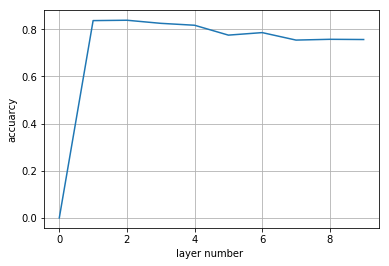

In [24]:
acc =np.zeros((10,10))
for i in range (1,10):
    K.clear_session()
    nin = Xtr_scale.shape[1]  # dimension of input data
    nh = 100     # number of hidden units
    nout = int(2)    # number of outputs = 10 since there are 10 classes
    model = Sequential()
    for j in range (i):
        model.add(Dense(nh, input_shape=(nin,), activation='sigmoid', name='hidden'+str(j)))
    model.add(Dense(nout, activation='softmax', name='output'))
    print (model.summary())
    from keras import optimizers
    opt = optimizers.Adam(lr=0.02 ,beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
    model.compile(optimizer=opt,loss='sparse_categorical_crossentropy',metrics=['accuracy'])
    hist = model.fit(Xtr_scale, y_train, epochs=5, batch_size=100, validation_data=(Xts_scale,y_test))
    acc[i][0]= hist.history['acc'][0]

plt.plot(np.arange(10),acc [:,0])
plt.grid()
plt.xlabel('layer number ')
plt.ylabel('accuarcy')

As the figure showing aboves, we found that maxmium acc will be around 1 output layer with 0.02 learning rate 40 hidden layer, 0-0.3 beta_1 and 0.1 beta_2 and also with 0.01 the epsilon. Since the val_acc is verly clost to acc and both of them is around 85% for the maxmium level, so it hard to say NN is a best model for this classication. Since  it taking us a lot of them to find every each best parameter to use. The model may be too complex for this kind of simple classciation. 